In [1]:
import numpy as np
import matplotlib.pyplot as plt

# User Matrix

In [2]:
V= np.array(list(map(int, input("Enter space separated allowed pixel values: ").split())))
V

Enter space separated allowed pixel values: 2 3 4


array([2, 3, 4])

In [3]:
# n, m= map(int, input("Enter size of matrix(n, m): ").split())
# print("Enter matrix values: ")
# l= []
# for i in range(n):
#     _= np.array(list(map(int, input().split())))
#     l.append(_)
# pix= np.array(l)
pix= np.array([[4, 1, 3, 2], [2, 3, 4, 5], [5, 2, 1, 4], [2, 2, 4, 3]])

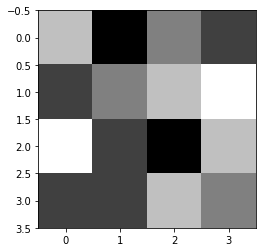

In [4]:
plt.imshow(pix, cmap= 'gray')
plt.show()#0- black, 1- white

In [5]:
def four_connected(V, pix):
    connected= []
    row_mov= [0, 1]
    col_mov= [1, 0]
    for i in range(pix.shape[0]):
        for j in range(pix.shape[1]):
            if pix[i][j] in V:
                for k in range(2):
                    cur_r= i+ row_mov[k]
                    cur_c= j+ col_mov[k]
                    if cur_r>= 0 and cur_r< pix.shape[0] and cur_c>= 0 and cur_c< pix.shape[1] and pix[cur_r][cur_c] in  V:
                        connected.append((i, j, cur_r, cur_c))
    return connected

In [6]:
def eight_connected(V, pix):
    connected= []
    row_mov= [-1, -1, 0, 1]
    col_mov= [0, 1, 1, 1]
    for i in range(pix.shape[0]):
        for j in range(pix.shape[1]):
            if pix[i][j] in V:
                for k in range(4):
                    cur_r= i+ row_mov[k]
                    cur_c= j+ col_mov[k]
                    if cur_r>= 0 and cur_r< pix.shape[0] and cur_c>= 0 and cur_c< pix.shape[1] and pix[cur_r][cur_c] in  V:
                        connected.append((i, j, cur_r, cur_c))
    return connected

In [7]:
def M_connected(V, pix):
    connected= []
    row_mov= [-1, 0, 1, 0]
    col_mov= [0, 1, 0, -1]
    row_diag= [-1, 1, 1, -1]
    col_diag= [1, 1, -1, -1]
    for i in range(pix.shape[0]):
        for j in range(pix.shape[1]):
            if pix[i][j] in V:
                flag= []
                for k in range(4):
                    cur_r= i+ row_mov[k]
                    cur_c= j+ col_mov[k]
                    flag.append(False)
                    if cur_r>= 0 and cur_r< pix.shape[0] and cur_c>= 0 and cur_c< pix.shape[1] and pix[cur_r][cur_c] in  V:
                        connected.append((i, j, cur_r, cur_c))
                        flag[k]= True
                flag= flag+ flag
                for k in range(4):
                    cur_r= i+ row_diag[k]
                    cur_c= j+ col_diag[k]
                    if cur_r>= 0 and cur_r< pix.shape[0] and cur_c>= 0 and cur_c< pix.shape[1] and pix[cur_r][cur_c] in  V:
                        if flag[k: k+2] ==[False, False]:
                            connected.append((i, j, cur_r, cur_c))
    return connected

In [8]:
connected4= four_connected(V, pix)
for i in connected4:
    print(i[:2], "->", i[2:])

(0, 0) -> (1, 0)
(0, 2) -> (0, 3)
(0, 2) -> (1, 2)
(1, 0) -> (1, 1)
(1, 1) -> (1, 2)
(1, 1) -> (2, 1)
(2, 1) -> (3, 1)
(2, 3) -> (3, 3)
(3, 0) -> (3, 1)
(3, 1) -> (3, 2)
(3, 2) -> (3, 3)


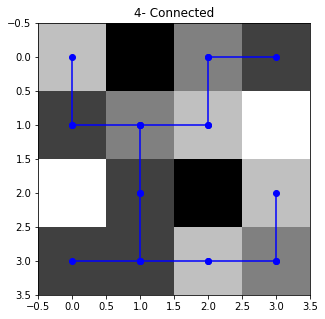

In [9]:
plt.figure(figsize= (5, 5))
plt.imshow(pix, cmap= 'gray')
for i in connected4:
    plt.plot([i[1], i[3]], [i[0], i[2]], 'b', marker= 'o')
plt.title('4- Connected')
plt.show()

In [10]:
connected8= eight_connected(V, pix)
for i in connected8:
    print(i[:2], "->", i[2:])

(0, 0) -> (1, 1)
(0, 2) -> (0, 3)
(1, 0) -> (0, 0)
(1, 0) -> (1, 1)
(1, 0) -> (2, 1)
(1, 1) -> (0, 2)
(1, 1) -> (1, 2)
(1, 2) -> (0, 2)
(1, 2) -> (0, 3)
(1, 2) -> (2, 3)
(2, 1) -> (1, 1)
(2, 1) -> (1, 2)
(2, 1) -> (3, 2)
(3, 0) -> (2, 1)
(3, 0) -> (3, 1)
(3, 1) -> (2, 1)
(3, 1) -> (3, 2)
(3, 2) -> (2, 3)
(3, 2) -> (3, 3)
(3, 3) -> (2, 3)


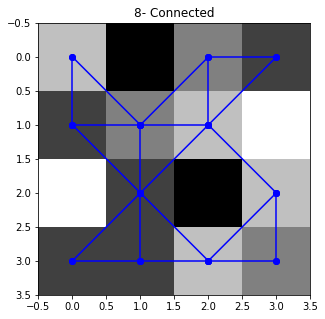

In [11]:
plt.figure(figsize= (5, 5))
plt.imshow(pix, cmap= 'gray')
for i in connected8:
    plt.plot([i[1], i[3]], [i[0], i[2]], 'b', marker= 'o')
plt.title('8- Connected')
plt.show()

In [13]:
connectedM= M_connected(V, pix)
for i in connectedM:
    print(i[:2], "->", i[2:])

(0, 0) -> (1, 0)
(0, 2) -> (0, 3)
(0, 2) -> (1, 2)
(0, 3) -> (0, 2)
(1, 0) -> (0, 0)
(1, 0) -> (1, 1)
(1, 1) -> (1, 2)
(1, 1) -> (2, 1)
(1, 1) -> (1, 0)
(1, 2) -> (0, 2)
(1, 2) -> (1, 1)
(1, 2) -> (2, 3)
(2, 1) -> (1, 1)
(2, 1) -> (3, 1)
(2, 3) -> (3, 3)
(2, 3) -> (1, 2)
(3, 0) -> (3, 1)
(3, 1) -> (2, 1)
(3, 1) -> (3, 2)
(3, 1) -> (3, 0)
(3, 2) -> (3, 3)
(3, 2) -> (3, 1)
(3, 3) -> (2, 3)
(3, 3) -> (3, 2)


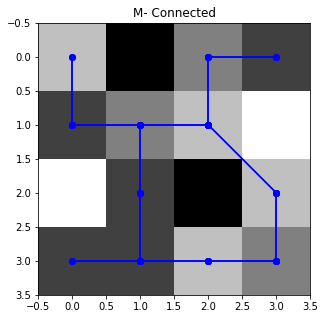

In [14]:
plt.figure(figsize= (5, 5))
plt.imshow(pix, cmap= 'gray')
for i in connectedM:
    plt.plot([i[1], i[3]], [i[0], i[2]], 'b', marker= 'o')
plt.title('M- Connected')
plt.show()

In [15]:
def check_connectivity(V, pix, p, q, type_connectivity= 'M'):
    if type_connectivity=='4':
        connected4= four_connected(V, pix)
        if tuple(list(p)+ list(q)) in connected4:
            return True
    elif type_connectivity=='8':
        connected8= eight_connected(V, pix)
        if tuple(list(p)+ list(q)) in connected8:
            return True
    elif type_connectivity=='M':
        connectedM= M_connected(V, pix)
        if tuple(list(p)+ list(q)) in connectedM:
            return True
    return False

In [16]:
check_connectivity(V, pix, [1, 1], [0, 2], 'M')

False

# Image

In [17]:
import cv2

In [18]:
img_file= input("Enter image file name: ")
img=cv2.imread(img_file, 0)

Enter image file name: ./Images/scenary.png


In [19]:
V_img= np.array(list(map(int, input('Enter V for image: ').split())))

Enter V for image: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19


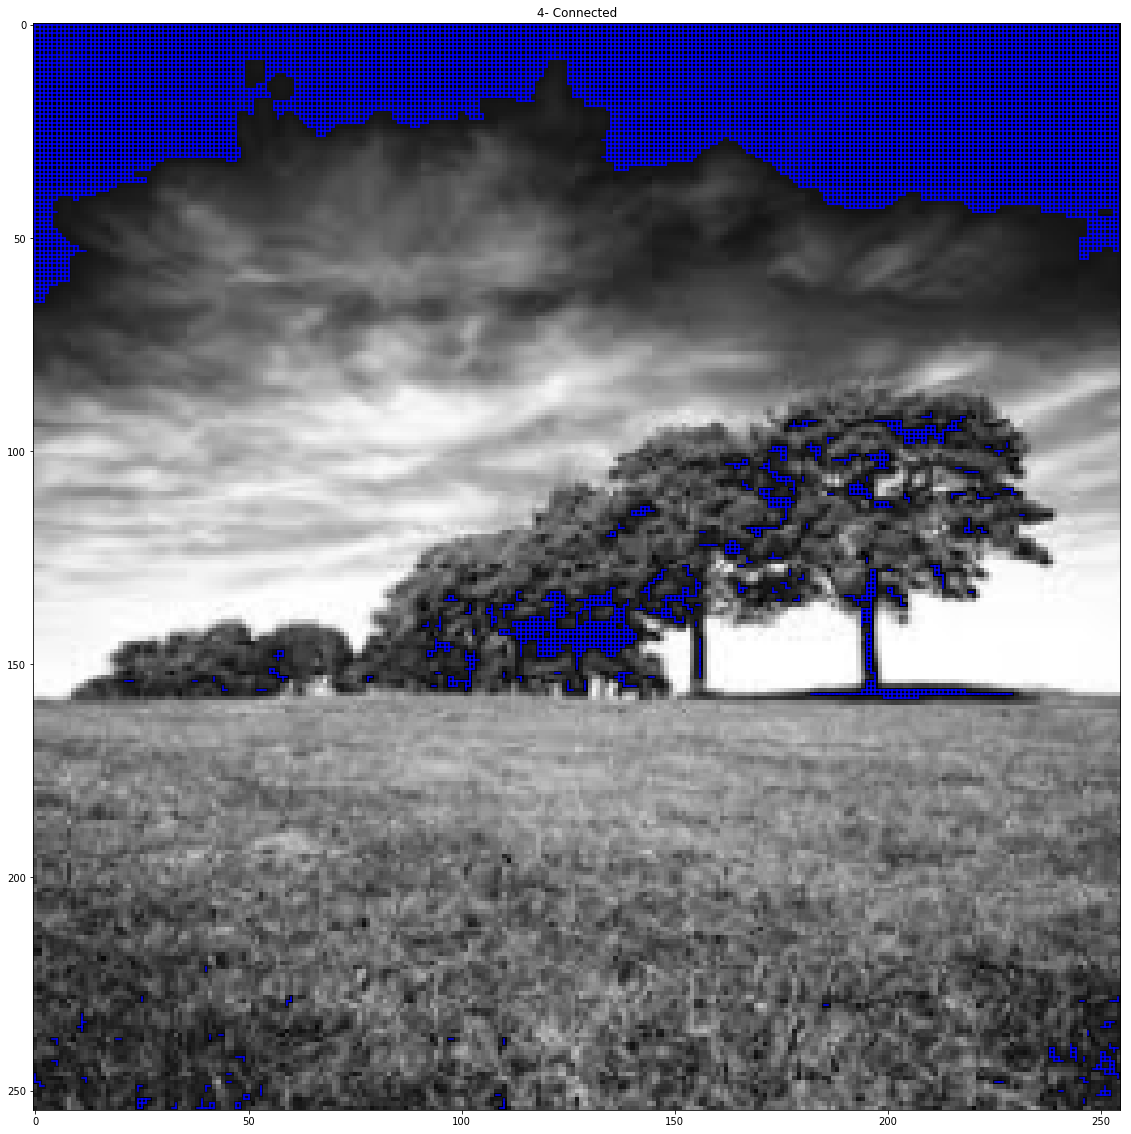

In [22]:
c4= four_connected(V_img, img)

plt.figure(figsize=(20,20))
plt.imshow(img, cmap= 'gray')

for i in c4:
    plt.plot([i[1], i[3]], [i[0], i[2]], 'b')

plt.title('4- Connected')
plt.show()

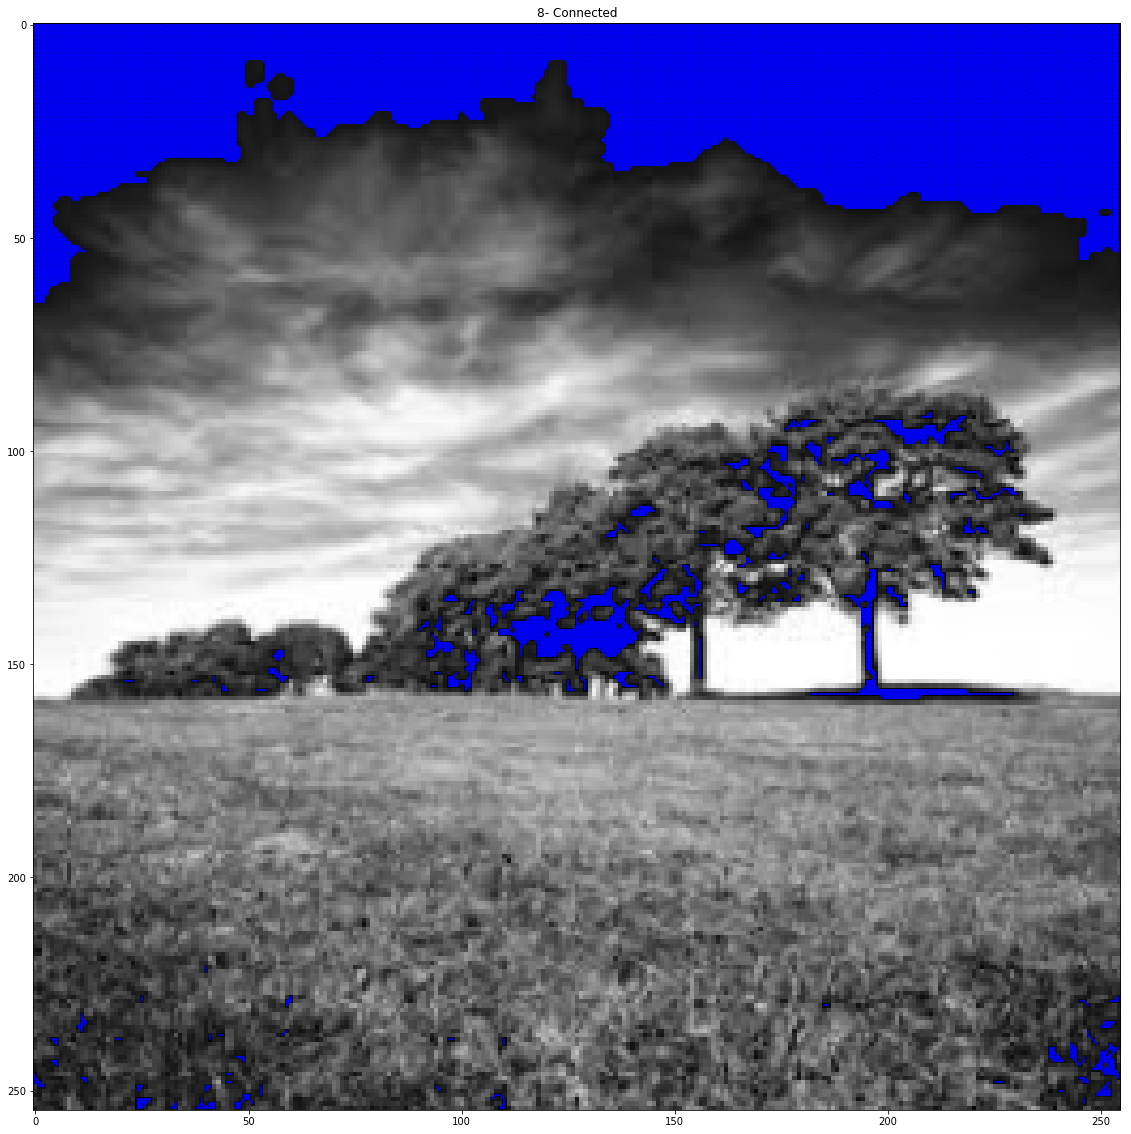

In [26]:
##c8= eight_connected(np.array([0, 1, 2, 3, 4, 5, 6, 7, 100, 150, 115, 221, 220, 225]), img)
c8= eight_connected(V_img, img)

plt.figure(figsize=(25.6,20))
plt.imshow(img, cmap= 'gray')
for i in c8:
    plt.plot([i[1], i[3]], [i[0], i[2]], 'b')
plt.title('8- Connected')
plt.show()

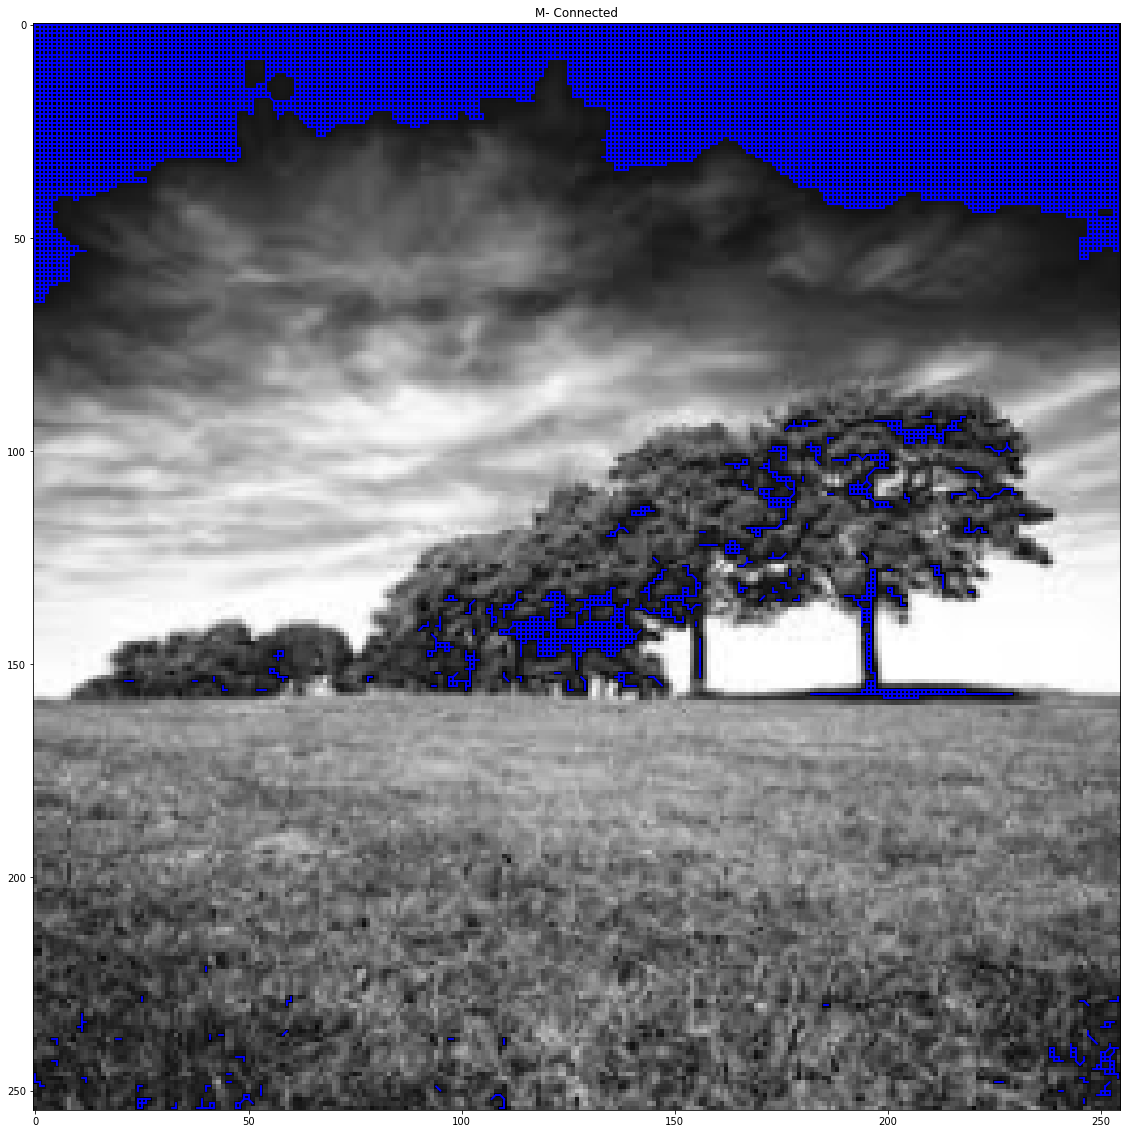

In [27]:
cm= M_connected(V_img, img)

plt.figure(figsize=(25.6,20))
plt.imshow(img, cmap= 'gray')

for i in cm:
    plt.plot([i[1], i[3]], [i[0], i[2]], 'b')
plt.title('M- Connected')
plt.show()